In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

In [3]:
biomass_data

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN
3,NEON,Guanica Forest,GUAN,-66.86870,17.96955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NEON,UNDERC,UNDE,-89.53725,46.23388,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
502,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN
503,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN
504,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068
505,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683


In [4]:
# Drop non-numeric columns
data_numeric = biomass_data.drop(['dataset', 'site_name', 'site_id', 'X', 'Y'], axis=1)

In [5]:
data_numeric

,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.
0,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN
1,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN
2,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN
...,...,...,...,...,...,...,...
502,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN
503,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN
504,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068
505,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683


In [6]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [7]:
# Iterate over rows to handle 'NA' values
for index, row in data_numeric.iterrows():
    na_columns = row.index[row.isna()]  # Get columns with 'NA' values
    data_numeric.loc[index, na_columns] = np.nan  # Set 'NA' values to NaN

In [8]:
data_numeric

,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.
0,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN
1,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN
2,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN
...,...,...,...,...,...,...,...
502,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN
503,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN
504,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068
505,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683


In [9]:
from sklearn.impute import SimpleImputer

# Impute NaN values with column mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

In [10]:
data_imputed

,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.
0,21.046901,18.783055,164.080719,37.921211,31.403246,114.922806,69.325028
1,21.046901,18.783055,334.279755,115.212837,31.403246,106.782768,69.325028
2,21.046901,18.783055,63.379155,69.890287,31.403246,42.734001,69.325028
3,21.046901,18.783055,54.910699,45.064585,31.403246,36.862953,69.325028
4,21.046901,18.783055,155.069643,139.331772,31.403246,91.699257,69.325028
...,...,...,...,...,...,...,...
502,21.046901,18.783055,155.035292,139.331772,31.403246,91.699257,69.325028
503,21.046901,18.783055,4.150213,9.719900,31.403246,0.000000,69.325028
504,244.415145,18.783055,357.726868,194.783264,31.403246,320.595123,819.682068
505,7.986143,18.783055,37.207724,59.854660,31.403246,36.563770,79.867683


In [11]:
# Perform hierarchical clustering
# You may need to adjust parameters such as 'n_clusters' and 'linkage' based on your data
# 'ward' linkage is generally preferred for Euclidean distance

#we use 3 clusters for 3 type of input, just to see what happens
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = cluster.fit_predict(data_imputed)

In [12]:
# Add cluster labels to the original dataset
biomass_data['cluster'] = clusters

In [13]:
# Save the clustering results to a CSV file
biomass_data.to_csv('clustering_results_hierarchical3.csv', index=False)

In [33]:
biomass_data

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.,cluster
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN,1
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN,1
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN,1
3,NEON,Guanica Forest,GUAN,-66.86870,17.96955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NEON,UNDERC,UNDE,-89.53725,46.23388,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN,1
503,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN,2
504,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068,0
505,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683,1


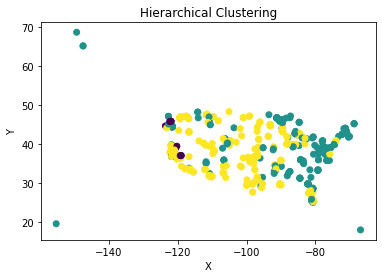

In [30]:
# Plot clusters
plt.scatter(biomass_data['X'], biomass_data['Y'], c=biomass_data['cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

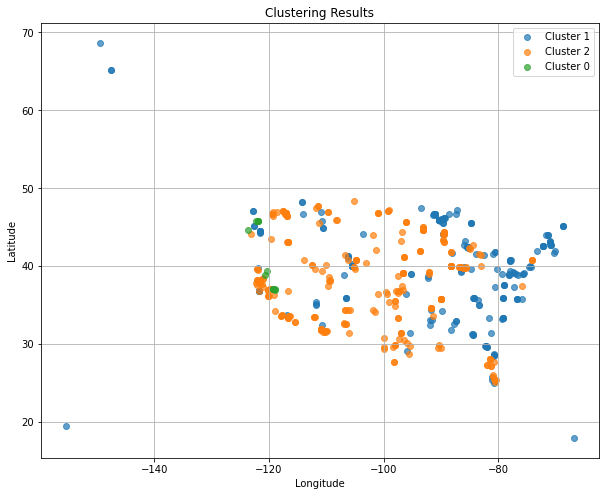

In [14]:
import matplotlib.pyplot as plt

# Assuming 'biomass_data' is your DataFrame with columns 'X' (longitude), 'Y' (latitude), and 'cluster'
plt.figure(figsize=(10, 8))
for cluster_id in biomass_data['cluster'].unique():
    cluster_data = biomass_data[biomass_data['cluster'] == cluster_id]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()